In [1]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

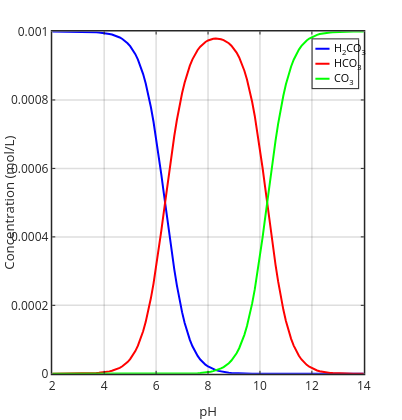

In [2]:
% constants
Ka1=10^-6.3; Ka2=10^-10.3; CT=1e-3; pH=2:0.1:14; H=10.^-pH;

database=['phreeqc.dat'];

%input info (mineral, total and species names, must match the PHREEQC database file !!!

minerals=[{'calcite'}]; % this is where you list the mineral phases to consider
totalvector=[CT; 1e-9];
totalnames=[{'C(4)'};{'Ca'}];
T=25; % temperature in degree C (run 5 degrees C and 35 degrees C to see the differnece)
show=0; % this should show the PHREEQC output to the screen. works in Matlab but not Octave
speciesexport=[{'CO2'};{'HCO3-'};{'CO3-2'}]; % need to tell what species we want to look at after the run
acid=[]; % not relevant for this problem
pe=20.75-pH; % you need initial values for pH and pe (Redox condition).  they aren't used but can' be blank
pHfixcheck=0; %1 makes the pH fixed, 0 means pH is free to vary (same for pe).  here MUST be 0.  
%can't do fixed pH AND open without adding cations

%[solutionspeciesconcs, speciesnames] = ...
%    runPHREEQCv3(T, 2, 13, totalnames, totalvector, minerals, speciesexport, database, show, [], 0)

for i=1:length(pH)

[solutionspeciesconcs, speciesnames] = ...
    runPHREEQCv3(T, pH(i), pe(i), totalnames, totalvector, minerals, speciesexport, database, show, [], 0);
    H2CO3(i) = solutionspeciesconcs(1);  
    HCO3(i) = solutionspeciesconcs(2);   
    CO3(i) = solutionspeciesconcs(3);    
end

figure;
plot(pH, H2CO3, 'b-', 'LineWidth', 2); hold on;
plot(pH, HCO3, 'r-', 'LineWidth', 2);
plot(pH, CO3, 'g-', 'LineWidth', 2);
xlabel('pH'); ylabel('Concentration (mol/L)');
legend('H_2CO_3', 'HCO_3', 'CO_3');
set(gca, 'FontSize', 12, 'LineWidth', 1.5);
grid on;
title('Carbonate Species Distribution vs pH');
